# Table of Contents
* 1. Import and review data  
    * 1.1 Import packages  
    * 1.2 Import data  
    * 1.3 Get overview of dataframe   
    * 1.4 Remove un-needed columns
* 2. Graph data  
    * 2.1 Target variable vs airline  
    * 2.2 Target variable vs origin location  
    * 2.3 Target variable vs time of year  
    * 2.4 Target variable vs time of day
    * 2.5 Target Variable vs day of the week
* 3. Calculate Categorical associations  
    * 3.1 Adjust target variable column type  
    * 3.2 Run Chi Squared and Cramer's V tests  
        * 3.2.1 Five variables - departure hour, flight number, month, airline, and airport
        * 3.2.2 One variable - airport
        * 3.2.3 One variable - airline
        * 3.2.4 One variable - month
        * 3.2.5 One variable - hour
        * 3.2.6 One variable - day
        * 3.2.7 One variable - flight number
   *  3.3 Merge data into new dataframe
* 4. Repeat above with new Target Variables  
    * 4.1 Add 2 more target variables
    * 4.2 Graph both new target varaibles against various features
    * 4.3 Calculate Categorical associations for both new target variables
    


# 1 Import and review data

1.1: Import packages

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

1.2 Import data

In [2]:
#confirm the disk location is correct for importing
os.chdir('C:/Users/steve/Documents/springboard/Capstone2/data')
cwd = os.getcwd()
print(cwd)

C:\Users\steve\Documents\springboard\Capstone2\data


In [3]:
#import data
df = pd.read_csv('clean_2018.csv')

1.3: Overview of data  
    Use .head() and .info() to get an overview of the data

In [4]:
df.head()

,Date,Airline,Flight_number,Origin,Dest,Planned_depart_time,Actual_depart_time,Dep_delay,Planned_arrival_time,Actual_arrival_time,...,Weather_delay,Nas_delay,Security_delay,Late_aircraft_delay,Airline_Name,Origin_Name,Origin_State,Dest_Name,Dest_State,Delayed_or_Cancelled
0,2018-01-01,UA,2429,EWR,DEN,15:17:00,15:12:00,-5.0,17:45:00,17:22:00,...,NaN,NaN,NaN,NaN,"United Airlines, Inc.",Newark,NJ,Denver,CO,N
1,2018-01-01,UA,2427,LAS,SFO,11:15:00,11:07:00,-8.0,12:54:00,12:30:00,...,NaN,NaN,NaN,NaN,"United Airlines, Inc.",Las Vegas,NV,San Francisco,CA,N
2,2018-01-01,UA,2426,SNA,DEN,13:35:00,13:30:00,-5.0,16:49:00,16:36:00,...,NaN,NaN,NaN,NaN,"United Airlines, Inc.",Orange County,CA,Denver,CO,N
3,2018-01-01,UA,2425,RSW,ORD,15:46:00,15:52:00,6.0,17:56:00,17:54:00,...,NaN,NaN,NaN,NaN,"United Airlines, Inc.",Fort Myers,FL,Chicago,IL,Y
4,2018-01-01,UA,2424,ORD,ALB,06:30:00,06:50:00,20.0,09:22:00,09:36:00,...,NaN,NaN,NaN,NaN,"United Airlines, Inc.",Chicago,IL,Albany,NY,Y


In [5]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7191323 entries, 0 to 7191322
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Date                  7191323 non-null  object 
 1   Airline               7191323 non-null  object 
 2   Flight_number         7191323 non-null  int64  
 3   Origin                7191323 non-null  object 
 4   Dest                  7191323 non-null  object 
 5   Planned_depart_time   7191323 non-null  object 
 6   Actual_depart_time    7079005 non-null  object 
 7   Dep_delay             7079005 non-null  float64
 8   Planned_arrival_time  7191323 non-null  object 
 9   Actual_arrival_time   7079005 non-null  object 
 10  Arrival_delay         7079005 non-null  float64
 11  Cancelled             7191323 non-null  float64
 12  Cancellation_code     112318 non-null   object 
 13  Distance              7191323 non-null  float64
 14  Carrier_delay         1352710 non-

1.4 Remove un-needed columns  


In [6]:
fi =df.drop(columns=['Planned_arrival_time', 'Actual_arrival_time', 'Arrival_delay', 'Cancellation_code', 'Carrier_delay',\
                     'Weather_delay', 'Nas_delay', 'Security_delay', 'Late_aircraft_delay'])

In [7]:
# Identify value counts of the target variable delayed or cancelled flights
fi['Delayed_or_Cancelled'].value_counts()


Delayed_or_Cancelled
N    4636512
Y    2554811
Name: count, dtype: int64

# 2: Graph data

2.1 Graph target variable (delayed/cancelled flights) vs airline

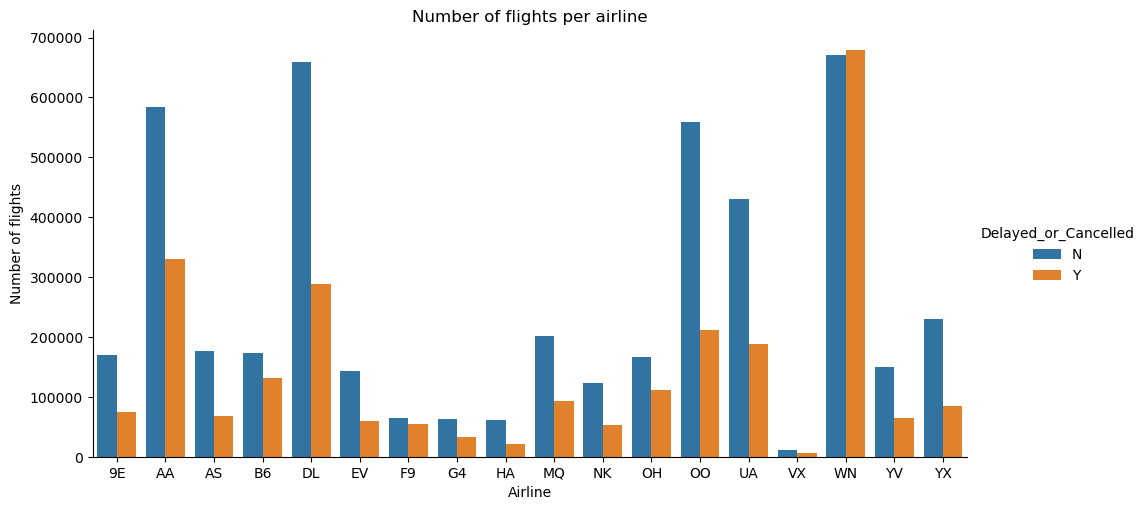

In [8]:
#create variable to sort airlines in alphabetical order
airlinefeat = sorted(fi['Airline'].unique())

#create graph of delayed/cancelled flights vs airline, ordered by the variable created above
sns.catplot(x='Airline', data=fi, kind='count', hue='Delayed_or_Cancelled', order = airlinefeat, aspect=2)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Airline')
plt.ylabel('Number of flights')
plt.title('Number of flights per airline')
plt.show()

In [9]:
#calculate the percentage and ratio of delayed/cancelled flights.

yn_airline = fi.groupby('Airline')['Delayed_or_Cancelled'].value_counts().unstack()
yn_airline['percent_Y'] = (yn_airline['Y'] / (yn_airline['N'] + yn_airline['Y'])) * 100
yn_airline['ratio_Y_to_N'] = yn_airline['Y'] / yn_airline['N']
yn_airline.sort_values('percent_Y', ascending = False)

Delayed_or_Cancelled,N,Y,percent_Y,ratio_Y_to_N
Airline,,,,
WN,671058,678624,50.280288,1.011275
F9,64336,55409,46.272496,0.861244
B6,173362,130668,42.978653,0.753729
OH,166168,111158,40.082069,0.668949
AA,583489,330276,36.144523,0.566036
G4,62405,33517,34.941932,0.537088
VX,11807,5774,32.842273,0.489032
MQ,201751,92715,31.485808,0.459552
9E,169783,75331,30.733047,0.443690


Based on the above visual inspection and calculations, most airlines have a ratio of approximatly 50% or less delayed/cancelled flights compared to flights that take off on time. The notable exceptions are WN, with more delayed/cancelled flights than on time flights, and B6, F9, OH, which have a ratio greater than 60% of their flights. This means that for WN, over 50% of their flights are delayed/cancelled; for B6, F9, and OH, between 40%-46% of their flights are delayed/cancelled 

2.2 Graph target variable (delayed/cancelled flights) vs Origin location. Note that this is based on the state(and territories) that the flight departed from, not the specific airport. 

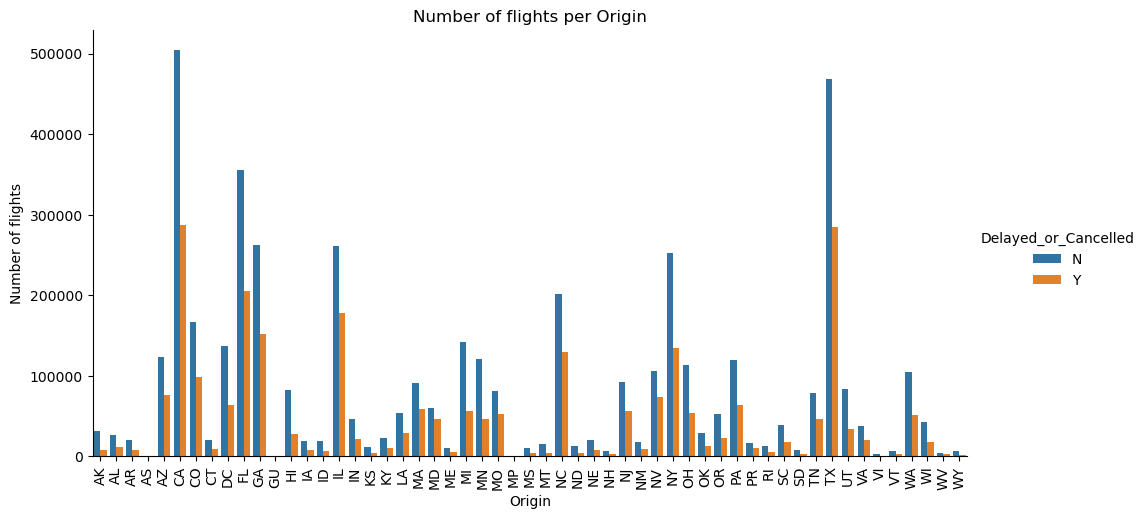

In [10]:
#create variable to sort origins in alphabetical order
originfeat = sorted(fi['Origin_State'].unique())

#create graph of delayed/cancelled flights vs origin, ordered by the variable created above
sns.catplot(x='Origin_State', data=fi, kind='count', hue='Delayed_or_Cancelled', order=originfeat, aspect=2)
plt.xticks(rotation='vertical')
plt.xlabel('Origin')
plt.ylabel('Number of flights')
plt.title('Number of flights per Origin')
plt.show()

In [11]:
#calculate the percentage and ratio of delayed/cancelled flights.

yn_state = fi.groupby('Origin_State')['Delayed_or_Cancelled'].value_counts().unstack()
yn_state['percent_Y'] = (yn_state['Y'] / (yn_state['N'] + yn_state['Y'])) * 100
yn_state['ratio_Y_to_N'] = yn_state['Y'] / yn_state['N']
yn_state.sort_values('percent_Y', ascending = False)

Delayed_or_Cancelled,N,Y,percent_Y,ratio_Y_to_N
Origin_State,,,,
AS,64,58,47.540984,0.906250
MD,59812,46833,43.914858,0.783003
NV,106097,73365,40.880521,0.691490
IL,260830,177992,40.561321,0.682406
MO,81210,53126,39.547106,0.654181
NC,201116,130218,39.301128,0.647477
PR,16522,10682,39.266284,0.646532
MA,91550,58686,39.062542,0.641027
AZ,123910,75848,37.969944,0.612122


2.3 Graph target variable (delayed/cancelled flights) vs time of year (monthly)

In [12]:
#create column that extracts the month of each flight
fi['month'] = pd.to_datetime(fi['Date'])
fi['month'] = fi['month'].dt.month

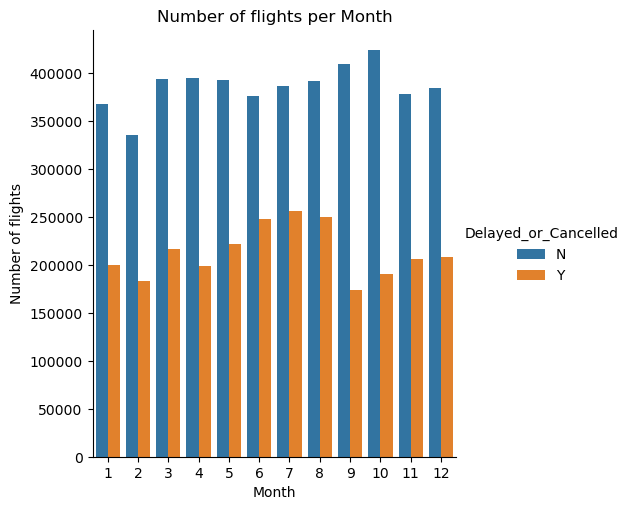

In [13]:
#create graph of delayed/cancelled flights vs time of year (by month).
sns.catplot(x='month', data=fi, kind='count', hue='Delayed_or_Cancelled')
plt.xlabel('Month')
plt.ylabel('Number of flights')
plt.title('Number of flights per Month')
plt.show()

In [14]:
#calculate the percentage and ratio of delayed/cancelled flights.

yn_month = fi.groupby('month')['Delayed_or_Cancelled'].value_counts().unstack()
yn_month['percent_Y'] = (yn_month['Y'] / (yn_month['N'] + yn_month['Y'])) * 100
yn_month['ratio_Y_to_N'] = yn_month['Y'] / yn_month['N']
yn_month.sort_values('percent_Y', ascending = False)

Delayed_or_Cancelled,N,Y,percent_Y,ratio_Y_to_N
month,,,,
7,386589,256092,39.847452,0.662440
6,375729,248087,39.769259,0.660282
8,391881,250085,38.956113,0.638166
5,392801,221601,36.067754,0.564156
3,393923,216797,35.498592,0.550354
11,378241,206478,35.312347,0.545890
2,335790,183168,35.295342,0.545484
1,368304,200219,35.217397,0.543624
12,384144,208119,35.139625,0.541773


2.4 Graph target variable (delayed/cancelled flights) vs time of day (hourly)

In [15]:
#create column that extracts and rounds the flight time to the nearest hour

fi['hour_depart'] = pd.to_datetime(fi['Planned_depart_time'], format='%H:%M:%S')
fi['hour_depart'] = fi['hour_depart'].dt.round('H')

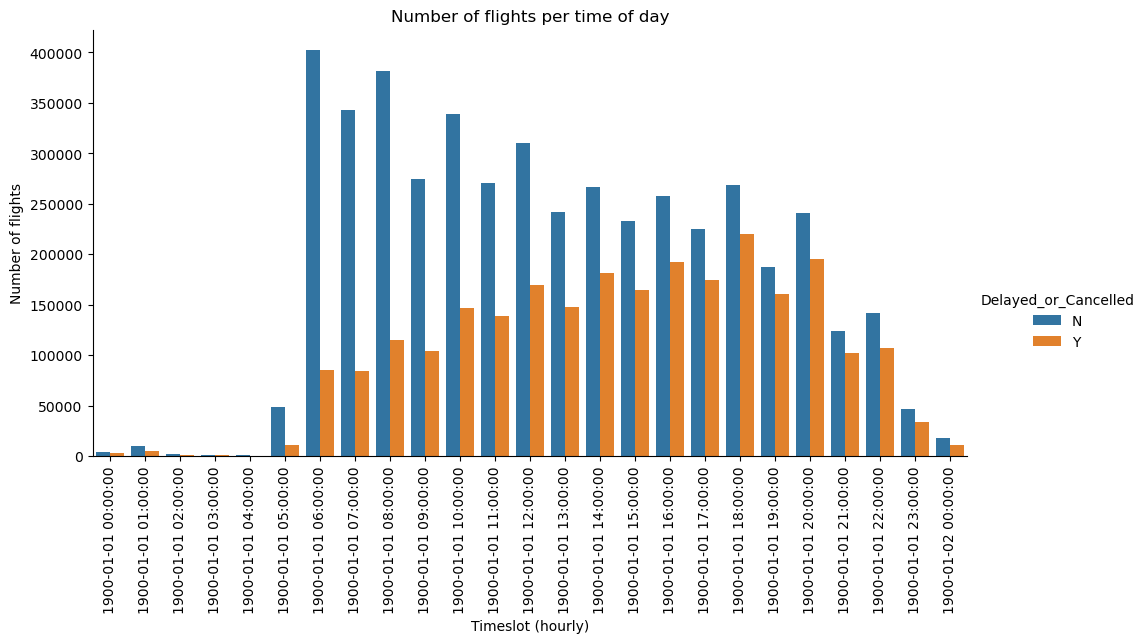

In [16]:
#create variable to sort hours in time order
timefeat=sorted(fi['hour_depart'].unique())

#create graph of delayed/cancelled flights vs time of day (by day), ordered by the variable above

sns.catplot(x='hour_depart', hue ='Delayed_or_Cancelled', data=fi, kind='count', aspect=2, order=timefeat)
plt.xticks(rotation='vertical')
plt.xlabel('Timeslot (hourly)')
plt.ylabel('Number of flights')
plt.title('Number of flights per time of day')
plt.show()

In [17]:
#calculate the percentage and ratio of delayed/cancelled flights.

yn_hour = fi.groupby('hour_depart')['Delayed_or_Cancelled'].value_counts().unstack()
yn_hour['percent_Y'] = (yn_hour['Y'] / (yn_hour['N'] + yn_hour['Y'])) * 100
yn_hour['ratio_Y_to_N'] = yn_hour['Y'] / yn_hour['N']
yn_hour.sort_values('percent_Y', ascending = False)

Delayed_or_Cancelled,N,Y,percent_Y,ratio_Y_to_N
hour_depart,,,,
1900-01-01 19:00:00,186934,160871,46.253217,0.860576
1900-01-01 21:00:00,123909,101647,45.065084,0.820336
1900-01-01 18:00:00,268118,219525,45.017564,0.818763
1900-01-01 20:00:00,240455,195324,44.821802,0.812310
1900-01-01 17:00:00,224952,174553,43.692319,0.775957
1900-01-01 03:00:00,988,764,43.607306,0.773279
1900-01-01 22:00:00,142206,107227,42.988297,0.754026
1900-01-01 16:00:00,257440,192460,42.778395,0.747592
1900-01-01 04:00:00,800,587,42.321557,0.733750


2.5 Graph target variable (delayed/cancelled flights) vs day of the week

In [18]:
#create column that extracts the day of the week

fi['day'] = pd.to_datetime(fi['Date'], format='%Y-%m-%d')
fi['day'] = fi['day'].dt.day_name()

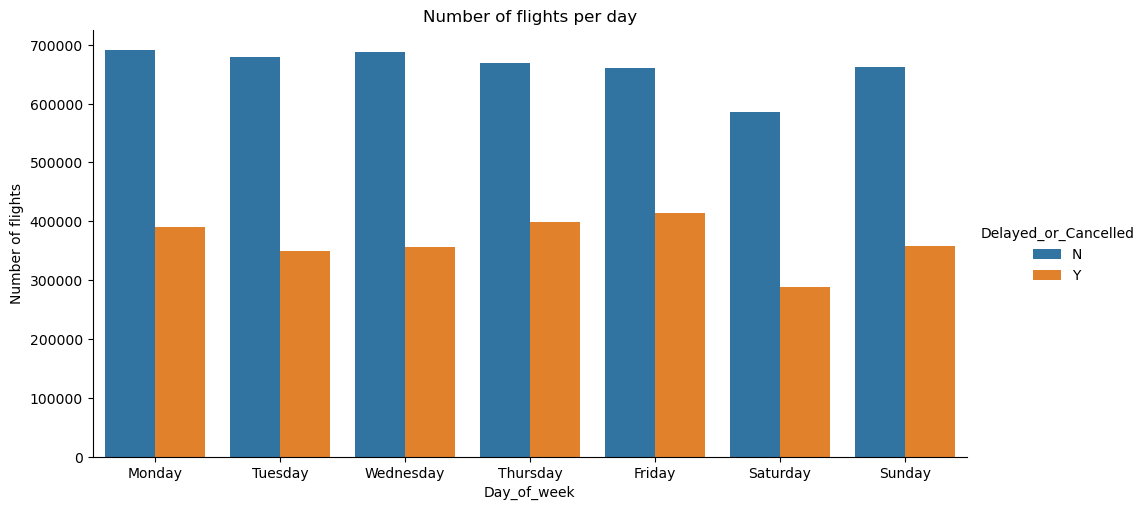

In [19]:
#create graph of delayed/cancelled flights vs day of the week.
sns.catplot(x='day', data=fi, kind='count', hue='Delayed_or_Cancelled', aspect = 2)
plt.xlabel('Day_of_week')
plt.ylabel('Number of flights')
plt.title('Number of flights per day')
plt.show()

In [20]:
#calculate the percentage and ratio of delayed/cancelled flights.

yn_day = fi.groupby('day')['Delayed_or_Cancelled'].value_counts().unstack()
yn_day['percent_Y'] = (yn_day['Y'] / (yn_day['N'] + yn_day['Y'])) * 100
yn_day['ratio_Y_to_N'] = yn_day['Y'] / yn_day['N']
yn_day.sort_values('percent_Y', ascending = False)

Delayed_or_Cancelled,N,Y,percent_Y,ratio_Y_to_N
day,,,,
Friday,660727,414228,38.534450,0.626928
Thursday,669304,398032,37.292099,0.594695
Monday,690683,391012,36.148082,0.566124
Sunday,661511,358312,35.134724,0.541657
Wednesday,688356,355686,34.068170,0.516718
Tuesday,679494,350170,34.008181,0.515339
Saturday,586437,287371,32.887202,0.490029


# 3. Calculate Categorical associations  


3.1 Adjust target variable column type  

In [21]:
#create a binary column for delayed/cancelled flights
fi['dcn']= fi['Delayed_or_Cancelled']
fi['dcn'].replace(to_replace='N', value= 0, inplace=True)
fi['dcn'].replace(to_replace='Y', value= 1, inplace=True)


3.2 Calculate Chi squared and Cramer's V

3.2.1 Five variables - departure hour, flight number, month, airline, day, and airport


In [22]:
#create table

contingency_table = pd.crosstab([fi['hour_depart'], fi['Flight_number'], fi['month'], fi['Airline'], fi['Origin'], fi['day']], fi['dcn'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Define Cramer’s V
def cramers_v(chi2, n, min_dim):
    return np.sqrt(chi2 / (n * min_dim))

n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
combined = {'variable':'combined', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('combined')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

combined
Chi-Square Statistic: 3131731.1830897224
P-Value: 0.0
Cramér’s V: 0.6599147575441057


3.2.2 One variable - airport


In [23]:
#create table
tableOrigin = pd.crosstab([fi['Origin']], fi['dcn'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableOrigin)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
origin = {'variable':'origin', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('origin')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

origin
Chi-Square Statistic: 132095.82064439132
P-Value: 0.0
Cramér’s V: 0.13553146751105807


3.2.3 One variable - airline

In [24]:
#create table
tableAirline = pd.crosstab([fi['Airline']], fi['dcn'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableAirline)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
airline = {'variable':'airline', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}
print('airline')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

airline
Chi-Square Statistic: 216120.7393770501
P-Value: 0.0
Cramér’s V: 0.1733579746701739


3.2.4 One variable - month


In [25]:
#create table
tableMonth = pd.crosstab([fi['month']], fi['dcn'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableMonth)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
month = {'variable':'month', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('month')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

month
Chi-Square Statistic: 28338.13032546513
P-Value: 0.0
Cramér’s V: 0.0627742017463056


3.2.5 One variable - hour

In [26]:
#create table
tableHour = pd.crosstab([fi['hour_depart']], fi['dcn'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableHour)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
hour = {'variable':'hour', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('hour')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

hour
Chi-Square Statistic: 277479.3119349565
P-Value: 0.0
Cramér’s V: 0.19643139759873687


3.2.6 One variable - day of the week

In [27]:
#create table
tableday = pd.crosstab([fi['day']], fi['dcn'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableday)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
day = {'variable':'day', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('day')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

day
Chi-Square Statistic: 10612.72430733283
P-Value: 0.0
Cramér’s V: 0.03841572584929684


3.2.7 One variable - flight number

In [28]:
#create a column of unique airline flight numbers
fi['fnstring'] = fi['Flight_number'].astype(str)
fi['airflightnumber'] = fi['Airline'] + fi['fnstring']

#create table
tableFN = pd.crosstab([fi['airflightnumber']], fi['dcn'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableFN)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
flightnumber = {'variable':'flightnumber', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('flight number')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

flight number
Chi-Square Statistic: 523718.41068231507
P-Value: 0.0
Cramér’s V: 0.2698637324988604


3.3 Merge data into new dataframe


In [29]:
data = [combined, origin, airline, month, hour, day, flightnumber]
results = pd.DataFrame(data)
results

,variable,Chi-Square-Statistic,P-Value,Cramers-V
0,combined,3.131731e+06,0.0,0.659915
1,origin,1.320958e+05,0.0,0.135531
2,airline,2.161207e+05,0.0,0.173358
3,month,2.833813e+04,0.0,0.062774
4,hour,2.774793e+05,0.0,0.196431
5,day,1.061272e+04,0.0,0.038416
6,flightnumber,5.237184e+05,0.0,0.269864


Based on the above, flight delays and cancellations are affected by many factors, including the airline, the location of take off, and time of day, week, and month. While day of the week and the month are on the lower end, the flight number has the biggest impact on whether a flight will be delayed or cancelled becuase it combines airline, time of day, and location into 1 feature.

The above analysis only considered if a flight was on time/early or delayed/cancelled. It did not make a distinction between small delays, such as less than 15 minutes, versus long delays, such as over an hour. We will create and test new target variables to see if this makes a difference. The first new target variable (delay15m) will consider flights delayed by less than 15 minutes as still leaving on time. The second new target variable (delay60) will only look at flights delayed more than 60 minutes or cancelled.

# 4. Repeat above with new Target Variables  


4.1 Add target variable for flights delayed less than 15 minutes and flights delayed over 60 minutes/cancelled

In [30]:
#create new column that only assigns delayed status is flight delayed is more than 15 minutes
fi['Delay15m']= fi['Dep_delay']<=15
fi['Delay15m'].replace(to_replace=False, value= 'Y', inplace=True)
fi['Delay15m'].replace(to_replace=True, value= 'N', inplace=True)

In [31]:
#Create new column for flights that were cancelled or delayed by 60 minutes or more

fi['Delayed60m'] = (fi['Dep_delay'].isnull()) | (fi['Dep_delay']>60)
fi['Delayed60m'].replace(to_replace=False, value= 'N', inplace=True)
fi['Delayed60m'].replace(to_replace=True, value= 'Y', inplace=True)

In [32]:
fi.head()

,Date,Airline,Flight_number,Origin,Dest,Planned_depart_time,Actual_depart_time,Dep_delay,Cancelled,Distance,...,Dest_State,Delayed_or_Cancelled,month,hour_depart,day,dcn,fnstring,airflightnumber,Delay15m,Delayed60m
0,2018-01-01,UA,2429,EWR,DEN,15:17:00,15:12:00,-5.0,0.0,1605.0,...,CO,N,1,1900-01-01 15:00:00,Monday,0,2429,UA2429,N,N
1,2018-01-01,UA,2427,LAS,SFO,11:15:00,11:07:00,-8.0,0.0,414.0,...,CA,N,1,1900-01-01 11:00:00,Monday,0,2427,UA2427,N,N
2,2018-01-01,UA,2426,SNA,DEN,13:35:00,13:30:00,-5.0,0.0,846.0,...,CO,N,1,1900-01-01 14:00:00,Monday,0,2426,UA2426,N,N
3,2018-01-01,UA,2425,RSW,ORD,15:46:00,15:52:00,6.0,0.0,1120.0,...,IL,Y,1,1900-01-01 16:00:00,Monday,1,2425,UA2425,N,N
4,2018-01-01,UA,2424,ORD,ALB,06:30:00,06:50:00,20.0,0.0,723.0,...,NY,Y,1,1900-01-01 06:00:00,Monday,1,2424,UA2424,Y,N


4.2 Graph both new target varaibles against various features

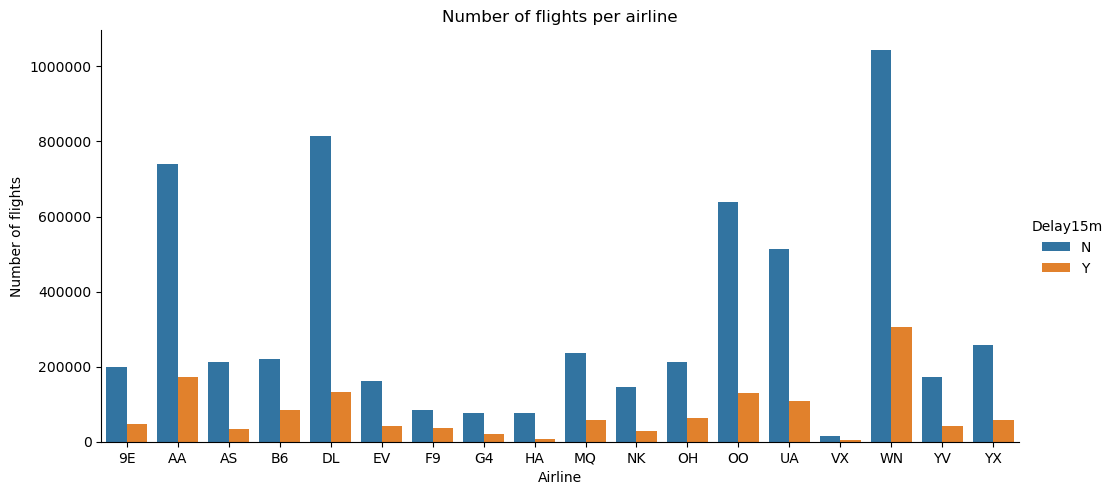

In [33]:
#create graph of flights by 15 plus minutes vs airline
sns.catplot(x='Airline', data=fi, kind='count', hue='Delay15m', order = airlinefeat, aspect=2)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Airline')
plt.ylabel('Number of flights')
plt.title('Number of flights per airline')
plt.show()

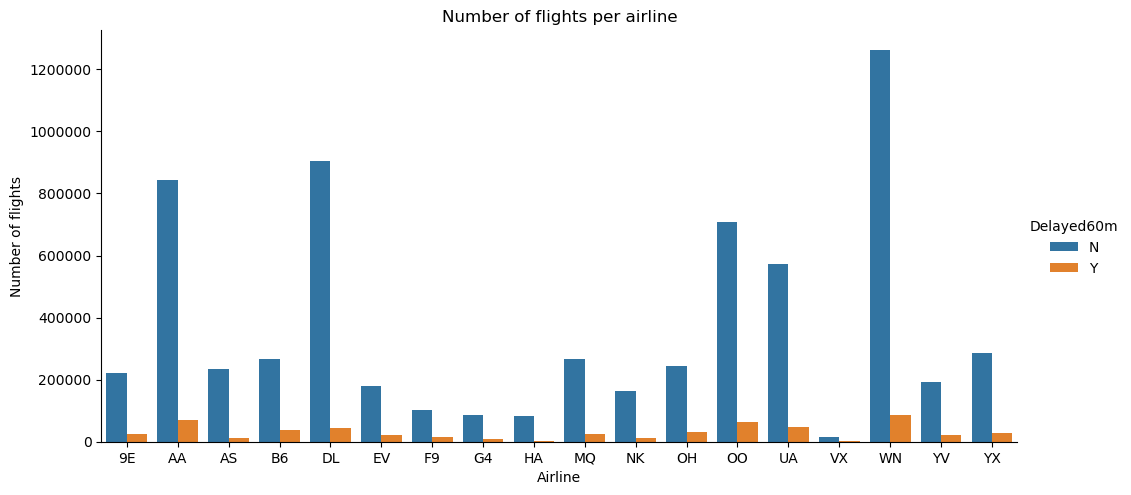

In [34]:
#create graph of flights cancelled/ delayed by 60 plus minutes vs airline
sns.catplot(x='Airline', data=fi, kind='count', hue='Delayed60m', order = airlinefeat, aspect=2)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Airline')
plt.ylabel('Number of flights')
plt.title('Number of flights per airline')
plt.show()

In [35]:
#calculate the percentage and ratio of flights cancelled/ delayed by 60 plus minutes

yn_airline60 = fi.groupby('Airline')['Delay15m'].value_counts().unstack()
yn_airline60['percent_Y'] = (yn_airline60['Y'] / (yn_airline60['N'] + yn_airline60['Y'])) * 100
yn_airline60['ratio_Y_to_N'] = yn_airline60['Y'] / yn_airline60['N']
yn_airline60.sort_values('percent_Y', ascending = False)

Delay15m,N,Y,percent_Y,ratio_Y_to_N
Airline,,,,
F9,83973,35772,29.873481,0.425994
B6,220179,83851,27.579844,0.380831
OH,213456,63870,23.030657,0.299219
WN,1044358,305324,22.621921,0.292356
G4,75465,20457,21.326703,0.271079
EV,160970,41179,20.370618,0.255818
MQ,237331,57135,19.402919,0.240740
YV,173140,41290,19.255701,0.238478
VX,14240,3341,19.003470,0.234621


In [36]:
#calculate the percentage and ratio of flights cancelled/ delayed by 60 plus minutes

yn_airline15 = fi.groupby('Airline')['Delayed60m'].value_counts().unstack()
yn_airline15['percent_Y'] = (yn_airline60['Y'] / (yn_airline15['N'] + yn_airline15['Y'])) * 100
yn_airline15['ratio_Y_to_N'] = yn_airline60['Y'] / yn_airline15['N']
yn_airline15.sort_values('percent_Y', ascending = False)

Delayed60m,N,Y,percent_Y,ratio_Y_to_N
Airline,,,,
F9,103548,16197,29.873481,0.345463
B6,267324,36706,27.579844,0.313668
OH,245604,31722,23.030657,0.260053
WN,1263222,86460,22.621921,0.241703
G4,87715,8207,21.326703,0.233221
EV,180202,21947,20.370618,0.228516
MQ,268022,26444,19.402919,0.213173
YV,193381,21049,19.255701,0.213516
VX,16198,1383,19.003470,0.206260


With our new target variables, we see a much different graph. While F9, OH, and B6 are still at the top of the leaderboard, WN has moved much lower down for flights delayed by more than 1 hour. This suggests that while WN may have more delays and cancellations overall, most of the delays are short (less than 60 minutes), whereas with F9, OH, and B6, delays can be both short and long.

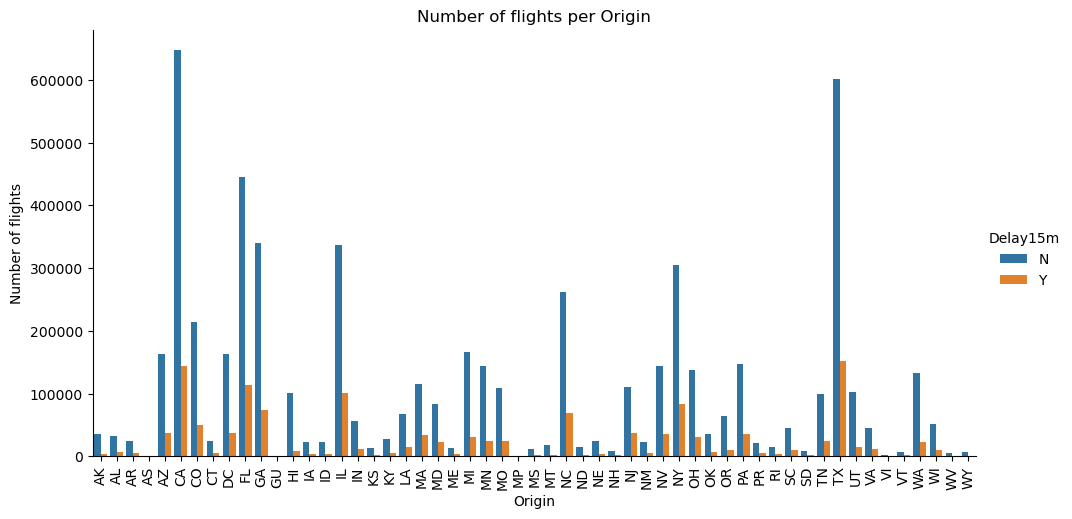

In [37]:
#create graph of flights cancelled/ delayed by 15 plus minutes vs airline
sns.catplot(x='Origin_State', data=fi, kind='count', hue='Delay15m', order=originfeat, aspect=2)
plt.xticks(rotation='vertical')
plt.xlabel('Origin')
plt.ylabel('Number of flights')
plt.title('Number of flights per Origin')
plt.show()

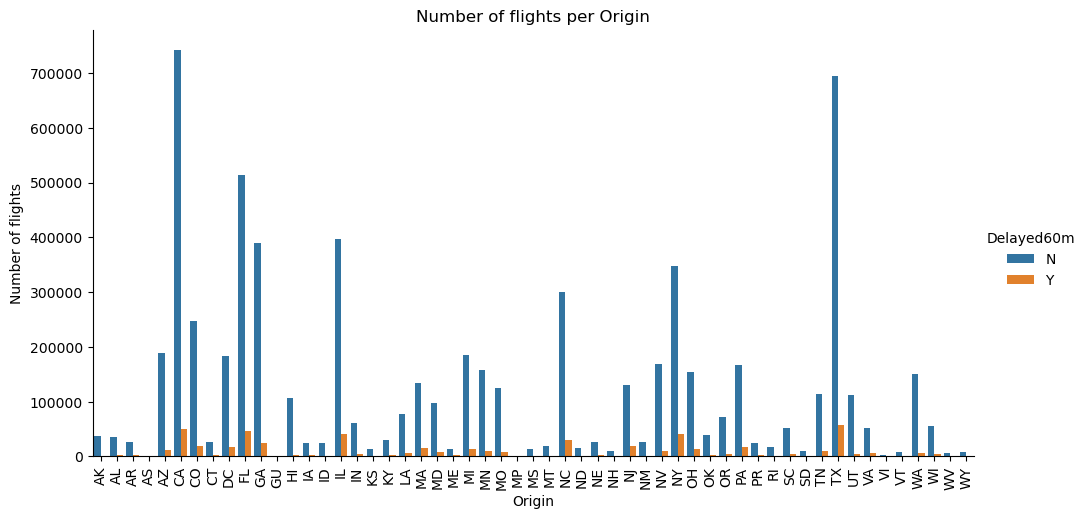

In [38]:
#create graph of flights cancelled/ delayed by 60 plus minutes vs airline
sns.catplot(x='Origin_State', data=fi, kind='count', hue='Delayed60m', order=originfeat, aspect=2)
plt.xticks(rotation='vertical')
plt.xlabel('Origin')
plt.ylabel('Number of flights')
plt.title('Number of flights per Origin')
plt.show()

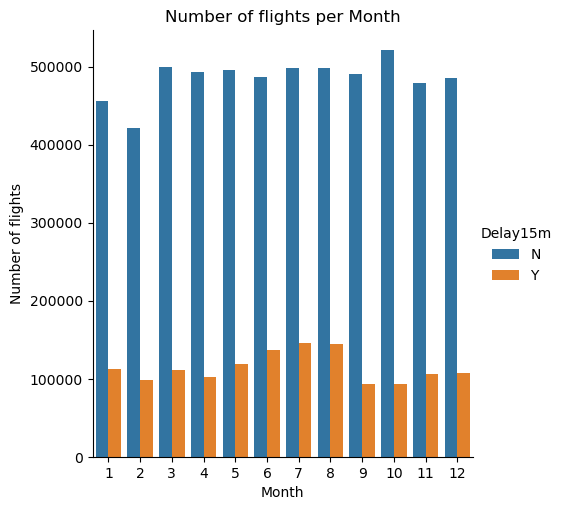

In [39]:
#create graph of flights cancelled/ delayed by 15 plus minutes vs time of year (by month).
sns.catplot(x='month', data=fi, kind='count', hue='Delay15m')
plt.xlabel('Month')
plt.ylabel('Number of flights')
plt.title('Number of flights per Month')
plt.show()

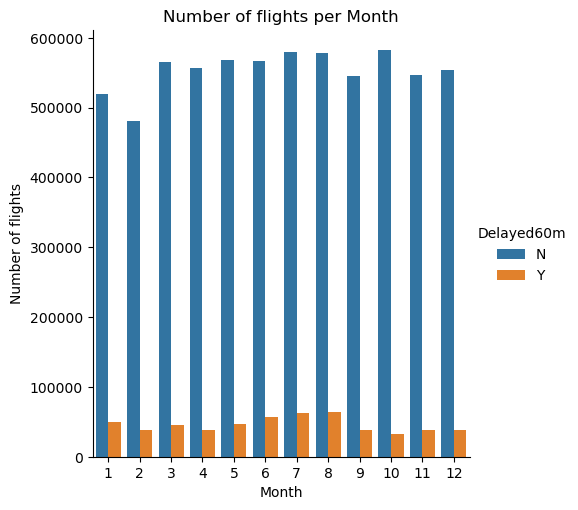

In [40]:
#create graph of flights cancelled/ delayed by 60 plus minutes vs time of year (by month).
sns.catplot(x='month', data=fi, kind='count', hue='Delayed60m')
plt.xlabel('Month')
plt.ylabel('Number of flights')
plt.title('Number of flights per Month')
plt.show()

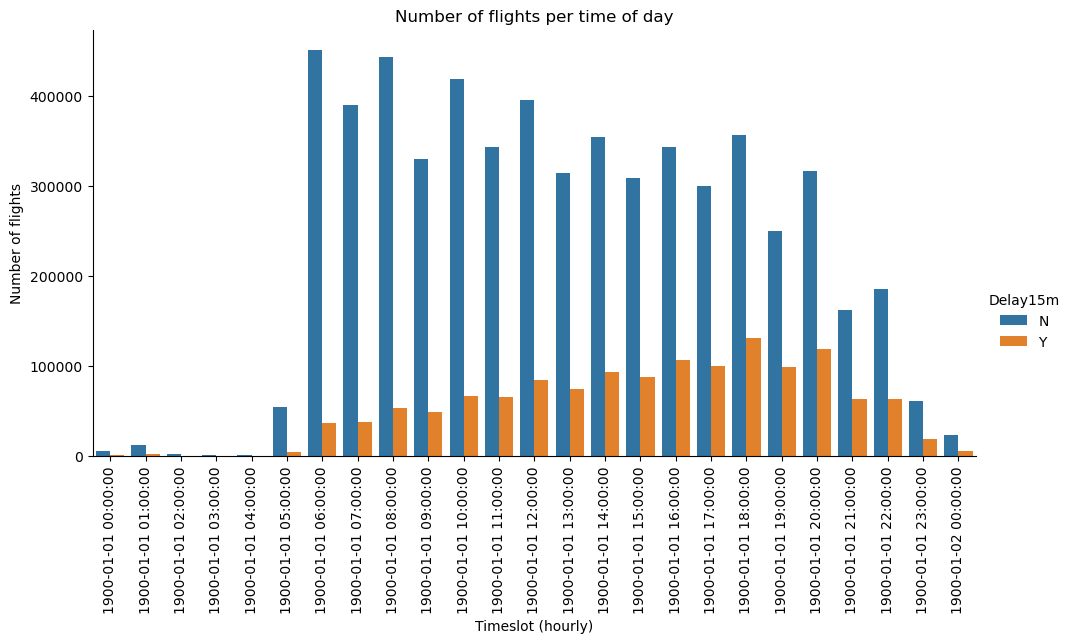

In [41]:
#create graph of flights cancelled/ delayed by 15 plus minutes vs time of day (by day)

sns.catplot(x='hour_depart', hue ='Delay15m', data=fi, kind='count', aspect=2, order=timefeat)
plt.xticks(rotation='vertical')
plt.xlabel('Timeslot (hourly)')
plt.ylabel('Number of flights')
plt.title('Number of flights per time of day')
plt.show()

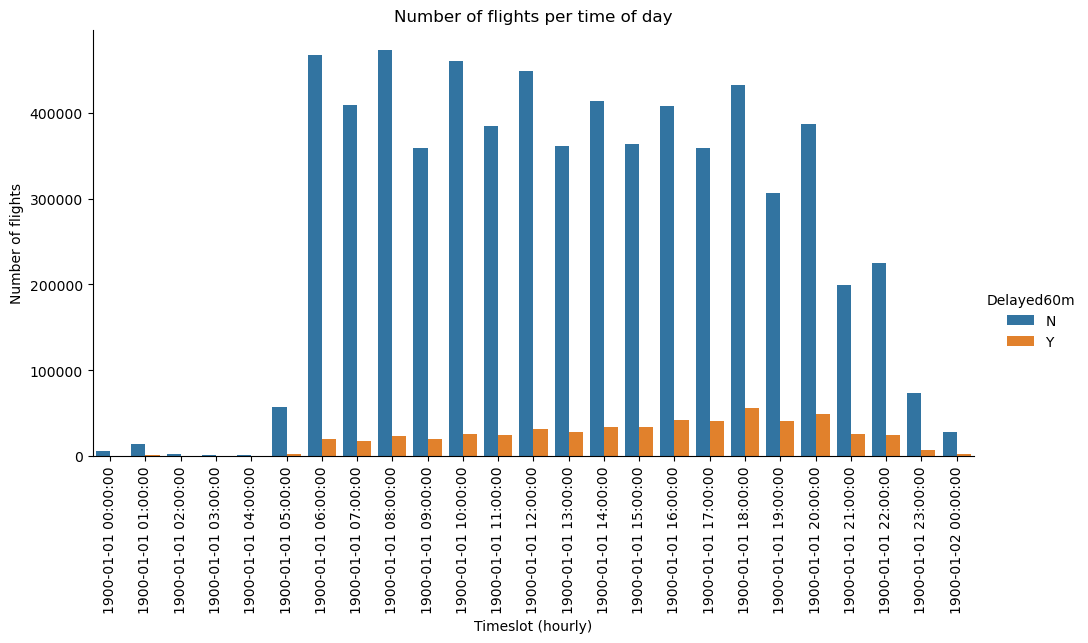

In [42]:
#create graph of flights cancelled/ delayed by 60 plus minutes vs time of day (by day)

sns.catplot(x='hour_depart', hue ='Delayed60m', data=fi, kind='count', aspect=2, order=timefeat)
plt.xticks(rotation='vertical')
plt.xlabel('Timeslot (hourly)')
plt.ylabel('Number of flights')
plt.title('Number of flights per time of day')
plt.show()

4.3 Calculate Categorical associations for both new target variables

In [43]:
#create a binary column for delayed/cancelled flights
fi['dcn15']= fi['Delay15m']
fi['dcn15'].replace(to_replace='N', value= 0, inplace=True)
fi['dcn15'].replace(to_replace='Y', value= 1, inplace=True)

In [44]:
#create a binary column for delayed/cancelled flights
fi['dcn60']= fi['Delayed60m']
fi['dcn60'].replace(to_replace='N', value= 0, inplace=True)
fi['dcn60'].replace(to_replace='Y', value= 1, inplace=True)

In [45]:
#create table

contingency_table = pd.crosstab([fi['hour_depart'], fi['Flight_number'], fi['month'], fi['Airline'], fi['Origin'], fi['day']], fi['dcn15'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Define Cramer’s V
def cramers_v(chi2, n, min_dim):
    return np.sqrt(chi2 / (n * min_dim))

n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
combined = {'variable':'combined', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('combined')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

combined
Chi-Square Statistic: 2897030.158812109
P-Value: 0.0
Cramér’s V: 0.6347052788418074


In [46]:
#create table
tableOrigin = pd.crosstab([fi['Origin']], fi['dcn15'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableOrigin)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
origin = {'variable':'origin', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('origin')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

origin
Chi-Square Statistic: 60556.18387787547
P-Value: 0.0
Cramér’s V: 0.09176453150554537


In [47]:
#create table
tableAirline = pd.crosstab([fi['Airline']], fi['dcn15'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableAirline)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
airline = {'variable':'airline', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}
print('airline')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

airline
Chi-Square Statistic: 71013.19930383866
P-Value: 0.0
Cramér’s V: 0.09937225421300955


In [48]:
#create table
tableMonth = pd.crosstab([fi['month']], fi['dcn15'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableMonth)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
month = {'variable':'month', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('month')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

month
Chi-Square Statistic: 25544.092248529727
P-Value: 0.0
Cramér’s V: 0.05959925611422262


In [49]:
#create table
tableHour = pd.crosstab([fi['hour_depart']], fi['dcn15'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableHour)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
hour = {'variable':'hour', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('hour')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

hour
Chi-Square Statistic: 218427.8586485613
P-Value: 0.0
Cramér’s V: 0.17428082868288813


In [50]:
#create table
tableday = pd.crosstab([fi['day']], fi['dcn15'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableday)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
day = {'variable':'day', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('day')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

day
Chi-Square Statistic: 9710.392634560976
P-Value: 0.0
Cramér’s V: 0.03674633225528011


In [51]:
#create table
tableFN = pd.crosstab([fi['airflightnumber']], fi['dcn15'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableFN)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
flightnumber = {'variable':'flightnumber', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('flight number')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

flight number
Chi-Square Statistic: 332545.5752895093
P-Value: 0.0
Cramér’s V: 0.2150409594231022


In [52]:
data2 = [combined, origin, airline, month, hour, day, flightnumber]
results2 = pd.DataFrame(data2)
results2

,variable,Chi-Square-Statistic,P-Value,Cramers-V
0,combined,2.897030e+06,0.0,0.634705
1,origin,6.055618e+04,0.0,0.091765
2,airline,7.101320e+04,0.0,0.099372
3,month,2.554409e+04,0.0,0.059599
4,hour,2.184279e+05,0.0,0.174281
5,day,9.710393e+03,0.0,0.036746
6,flightnumber,3.325456e+05,0.0,0.215041


In [53]:
#create table

contingency_table = pd.crosstab([fi['hour_depart'], fi['Flight_number'], fi['month'], fi['Airline'], fi['Origin'], fi['day']], fi['dcn60'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Define Cramer’s V
def cramers_v(chi2, n, min_dim):
    return np.sqrt(chi2 / (n * min_dim))

n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
combined = {'variable':'combined', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('combined')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

combined
Chi-Square Statistic: 2620282.0025910595
P-Value: 0.0
Cramér’s V: 0.6036283367773366


In [54]:
#create table
tableOrigin = pd.crosstab([fi['Origin']], fi['dcn60'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableOrigin)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
origin = {'variable':'origin', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('origin')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

origin
Chi-Square Statistic: 47117.09520809792
P-Value: 0.0
Cramér’s V: 0.08094403619288558


In [55]:
#create table
tableAirline = pd.crosstab([fi['Airline']], fi['dcn60'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableAirline)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
airline = {'variable':'airline', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}
print('airline')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

airline
Chi-Square Statistic: 51282.50814009768
P-Value: 0.0
Cramér’s V: 0.08444622323596701


In [56]:
#create table
tableMonth = pd.crosstab([fi['month']], fi['dcn60'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableMonth)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
month = {'variable':'month', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('month')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

month
Chi-Square Statistic: 20988.029440266982
P-Value: 0.0
Cramér’s V: 0.05402334044149495


In [57]:
#create table
tableHour = pd.crosstab([fi['hour_depart']], fi['dcn60'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableHour)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
hour = {'variable':'hour', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('hour')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

hour
Chi-Square Statistic: 71458.80827197581
P-Value: 0.0
Cramér’s V: 0.0996835478804881


In [58]:
#create table
tableday = pd.crosstab([fi['day']], fi['dcn60'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableday)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
day = {'variable':'day', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('day')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

day
Chi-Square Statistic: 6089.565025379377
P-Value: 0.0
Cramér’s V: 0.02909971518550569


In [59]:
#create table
tableFN = pd.crosstab([fi['airflightnumber']], fi['dcn60'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableFN)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
flightnumber = {'variable':'flightnumber', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('flight number')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

flight number
Chi-Square Statistic: 211301.8233362512
P-Value: 0.0
Cramér’s V: 0.17141436906473284


In [60]:
data3 = [combined, origin, airline, month, hour, day, flightnumber]
results3 = pd.DataFrame(data3)
results3

,variable,Chi-Square-Statistic,P-Value,Cramers-V
0,combined,2.620282e+06,0.0,0.603628
1,origin,4.711710e+04,0.0,0.080944
2,airline,5.128251e+04,0.0,0.084446
3,month,2.098803e+04,0.0,0.054023
4,hour,7.145881e+04,0.0,0.099684
5,day,6.089565e+03,0.0,0.029100
6,flightnumber,2.113018e+05,0.0,0.171414


In [61]:
merged = results.merge(results2, on='variable', suffixes= ('','_15'))
merged_all = merged.merge(results3, on='variable', suffixes= ('','60'))

In [62]:
merged_all

,variable,Chi-Square-Statistic,P-Value,Cramers-V,Chi-Square-Statistic_15,P-Value_15,Cramers-V_15,Chi-Square-Statistic60,P-Value60,Cramers-V60
0,combined,3.131731e+06,0.0,0.659915,2.897030e+06,0.0,0.634705,2.620282e+06,0.0,0.603628
1,origin,1.320958e+05,0.0,0.135531,6.055618e+04,0.0,0.091765,4.711710e+04,0.0,0.080944
2,airline,2.161207e+05,0.0,0.173358,7.101320e+04,0.0,0.099372,5.128251e+04,0.0,0.084446
3,month,2.833813e+04,0.0,0.062774,2.554409e+04,0.0,0.059599,2.098803e+04,0.0,0.054023
4,hour,2.774793e+05,0.0,0.196431,2.184279e+05,0.0,0.174281,7.145881e+04,0.0,0.099684
5,day,1.061272e+04,0.0,0.038416,9.710393e+03,0.0,0.036746,6.089565e+03,0.0,0.029100
6,flightnumber,5.237184e+05,0.0,0.269864,3.325456e+05,0.0,0.215041,2.113018e+05,0.0,0.171414


While the graphs of the 2 additional target variables show some variation in flight delays and cancellations compared to the original target, the chi-square statistic and cramer's v values show that the same features still affect the additional variables in the same way.